In [1]:
import pandas as pd 


In [25]:
balance_df = pd.read_excel('S:/Car/ML ready data/balance_frame.xlsx')
feature_df = pd.read_excel('S:/Car/ML ready data/feature_frame.xlsx')
balance_df.shape, feature_df.shape
balance_df.head()

,Unnamed: 0,Insurance Validity,Fuel Type,Year of Manufacture,bt,km,transmission,ownerNo,oem,model,...,Alloy Wheel Size,No Door Numbers,Mileage,Super Charger,Turning Radius,Top Speed,City,price_in_lakhs,Registration Year New,Gear
0,0,5,4,2015.0,2,120000,1,3,20,160,...,10,5.0,23.10,1,4.7,25,0,4.00,2018,3
1,1,2,4,2018.0,7,32706,1,2,6,50,...,4,4.0,17.00,1,5.3,40,0,8.11,2018,3
2,2,2,4,2018.0,2,11949,1,1,29,273,...,2,5.0,23.84,1,4.9,25,0,5.85,2018,3
3,3,2,4,2014.0,8,17794,1,1,9,87,...,2,4.0,19.10,1,4.7,47,0,4.62,2014,3
4,4,5,1,2015.0,7,60000,1,1,20,178,...,4,5.0,23.65,1,5.2,62,0,7.90,2018,3


In [27]:
balance_df.shape

(8369, 36)

In [24]:
from scipy.stats import zscore
import numpy as np

# Calculate z-scores
z_scores = np.abs(zscore(balance_df))

# Set a less strict threshold (e.g., 4)
threshold = 1
balance_df = balance_df[(z_scores < threshold).all(axis=1)]
balance_df.shape


(0, 36)

In [29]:
# Outliers removal using IQR

Q1 = balance_df.quantile(0.05)
Q3 = balance_df.quantile(0.95)
IQR = Q3 - Q1
balance_df = balance_df[~((balance_df < (Q1 - 1.5 * IQR)) |(balance_df > (Q3 + 1.5 * IQR))).any(axis=1)]
balance_df.shape

(7697, 36)

In [6]:
#Remove Outliers using z score

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(balance_df))
threshold = 2
balance_df = balance_df[(z < threshold).all(axis=1)]
#balance_df.shape
z

array([], shape=(0, 36), dtype=float64)

In [10]:
feature_df.head(2)

,Unnamed: 0,Features,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication
0,0,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Digital Odomete...","['Adjustable Head Lights', 'Manually Adjustabl...","['Centeral Locking', 'Child Safety Locks', 'Da...",0
1,1,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...","['Cd Player', 'Radio', 'Speakers Front', 'Spea..."


In [31]:
feature_df['Features'].dtype

dtype('O')

In [11]:
feature_features = set(feature for sublist in feature_df['Features'] for feature in sublist)
for feature in feature_features:
    feature_df[f'Feature_{feature}'] = feature_df['Features'].apply(lambda x: 1 if feature in x else 0)
feature_df.head(2)

,Unnamed: 0,Features,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication,Feature_i,Feature_W,Feature_A,...,Feature_C,Feature_,Feature_f,Feature_D,Feature_B,Feature_v,Feature_Q,Feature_O,Feature_z,Feature_j
0,0,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Digital Odomete...","['Adjustable Head Lights', 'Manually Adjustabl...","['Centeral Locking', 'Child Safety Locks', 'Da...",0,1,1,1,...,1,1,1,0,0,0,0,0,0,1
1,1,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...","['Cd Player', 'Radio', 'Speakers Front', 'Spea...",1,1,1,...,1,1,0,0,1,0,0,0,0,1


In [35]:
feature_df['Safety'] =  feature_df['Safety'].astype(str)
feature_df['Safety'].dtype

dtype('O')

Sample Code

In [12]:
feature_df.drop(columns=['Safety','Features','Comfort & Convenience','Interior','Exterior','Entertainment & Communication'],inplace=True)

In [13]:
feature_df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
df = pd.concat([balance_df,feature_df],axis=1)
df.head(2)

,Unnamed: 0,Insurance Validity,Fuel Type,Year of Manufacture,bt,km,transmission,ownerNo,oem,model,...,Feature_C,Feature_,Feature_f,Feature_D,Feature_B,Feature_v,Feature_Q,Feature_O,Feature_z,Feature_j
8,8.0,2.0,4.0,2018.0,8.0,37000.0,0.0,1.0,20.0,163.0,...,1,1,0,0,1,0,0,0,0,1
10,10.0,5.0,4.0,2018.0,2.0,50000.0,1.0,1.0,20.0,157.0,...,1,1,0,0,1,0,0,0,0,1


In [41]:
df.isna().sum()

Unnamed: 0              0
Insurance Validity      0
Fuel Type               0
Year of Manufacture    20
bt                      0
                       ..
Feature_e               0
Feature_i               0
Feature_G               0
Feature_k               0
Feature_[               0
Length: 88, dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=42)
df['cluster'] = k_means.fit_predict(df.drop(columns=['price_in_lakhs','Unnamed: 0'],axis=1))

In [18]:
cluster_means = df.groupby('cluster')['price_in_lakhs'].mean().reset_index()
df = df.merge(cluster_means, on='cluster', suffixes=('', '_cluster_mean'))
df.head(2)

,Unnamed: 0,Insurance Validity,Fuel Type,Year of Manufacture,bt,km,transmission,ownerNo,oem,model,...,Feature_f,Feature_D,Feature_B,Feature_v,Feature_Q,Feature_O,Feature_z,Feature_j,cluster,price_in_lakhs_cluster_mean
0,8.0,2.0,4.0,2018.0,8.0,37000.0,0.0,1.0,20.0,163.0,...,0,0,1,0,0,0,0,1,2,6.224613
1,10.0,5.0,4.0,2018.0,2.0,50000.0,1.0,1.0,20.0,157.0,...,0,0,1,0,0,0,0,1,0,5.513028


In [54]:
final_df = balance_df[important_features_names]

In [55]:
final_df.shape

(7697, 11)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = balance_df.drop(columns=['price_in_lakhs'],axis=1)
y = balance_df['price_in_lakhs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2_score(y_test, y_pred)

Mean Squared Error: 5.249370559681819


0.9376110775495605

In [66]:
X.columns

Index(['Unnamed: 0', 'Insurance Validity', 'Fuel Type', 'Year of Manufacture',
       'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear',
       'centralVariantId', 'Wheel Size', 'Color', 'Displacement',
       'No of Cylinder', 'Values per Cylinder', 'Fuel Suppy System',
       'Turbo Charger', 'Length', 'Width', 'Drive Type', 'Seating Capacity',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type',
       'Alloy Wheel Size', 'No Door Numbers', 'Mileage', 'Super Charger',
       'Turning Radius', 'Top Speed', 'City', 'Registration Year New', 'Gear'],
      dtype='object')

In [67]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
20,Width,0.301263
34,Gear,0.297603
10,modelYear,0.074467
12,Wheel Size,0.063944
3,Year of Manufacture,0.060170
19,Length,0.033890
5,km,0.022462
31,Top Speed,0.016376
6,transmission,0.014925
14,Displacement,0.014215


In [69]:
important_features = feature_importances[feature_importances['Importance'] > 0.005]
len(important_features)

20

In [60]:
important_features_names = important_features['Feature'].values

In [70]:
important_features_names

array(['Width', 'Gear', 'Year of Manufacture', 'Wheel Size', 'modelYear',
       'Length', 'km', 'Top Speed', 'transmission', 'Displacement',
       'centralVariantId', 'Turning Radius'], dtype=object)

In [35]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]


Feature: 0, Score: 0.00130
Feature: 1, Score: 0.00102
Feature: 2, Score: 0.07657
Feature: 3, Score: 0.00184
Feature: 4, Score: 0.02330
Feature: 5, Score: 0.01498
Feature: 6, Score: 0.00109
Feature: 7, Score: 0.00236
Feature: 8, Score: 0.00599
Feature: 9, Score: 0.05847
Feature: 10, Score: 0.01379
Feature: 11, Score: 0.06421
Feature: 12, Score: 0.00366
Feature: 13, Score: 0.01447
Feature: 14, Score: 0.00050
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00279
Feature: 17, Score: 0.00149
Feature: 18, Score: 0.03424
Feature: 19, Score: 0.30137
Feature: 20, Score: 0.00275
Feature: 21, Score: 0.00727
Feature: 22, Score: 0.00124
Feature: 23, Score: 0.00210
Feature: 24, Score: 0.00656
Feature: 25, Score: 0.00610
Feature: 26, Score: 0.00057
Feature: 27, Score: 0.00676
Feature: 28, Score: 0.00094
Feature: 29, Score: 0.01268
Feature: 30, Score: 0.01643
Feature: 31, Score: 0.00591
Feature: 32, Score: 0.00968
Feature: 33, Score: 0.29757


<BarContainer object of 34 artists>

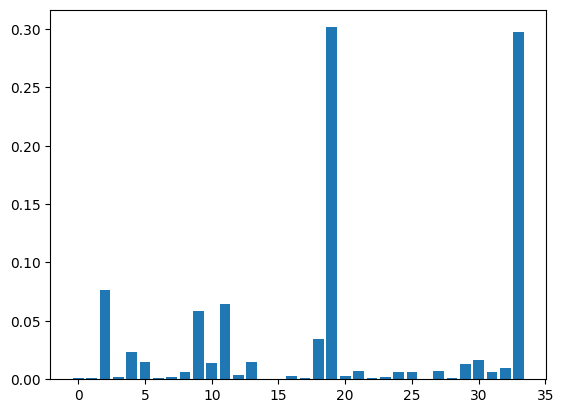

In [31]:
#feature_importance
import matplotlib.pyplot as plt
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)

In [33]:
# take top 10 features with name of the feature
import numpy as np

importance = model.feature_importances_

indices = np.argsort(importance)[::-1][:10]

for i in indices:
    print(feature_df.columns[i], importance[i])

plt.bar([x for x in range(len(importance))], importance)

IndexError: index 19 is out of bounds for axis 0 with size 7

In [ ]:
# Aggregating continuous variable by clusters
cluster_means = df.groupby('cluster')['target'].mean().reset_index()
df = df.merge(cluster_means, on='cluster', suffixes=('', '_cluster_mean'))

# Splitting data for supervised learning
X = df.drop(columns=['target', 'safety'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Sample DataFrame
df = pd.DataFrame({
    'category1': ['A', 'B', 'A', 'C'],
    'category2': ['X', 'Y', 'X', 'Z'],
    'safety': [['feature1', 'feature2'], ['feature2', 'feature3'], ['feature1'], ['feature1', 'feature3']],
    'target': [10, 20, 30, 40]
})

# One-Hot Encoding categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['category1', 'category2']])

# Handling list of categories (e.g., safety features)
safety_features = set(feature for sublist in df['safety'] for feature in sublist)
for feature in safety_features:
    df[f'safety_{feature}'] = df['safety'].apply(lambda x: 1 if feature in x else 0)

# Combine encoded features with safety features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(['category1', 'category2']))
df = pd.concat([df, encoded_df], axis=1)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df.drop(columns=['safety', 'target']))

# Aggregating continuous variable by clusters
cluster_means = df.groupby('cluster')['target'].mean().reset_index()
df = df.merge(cluster_means, on='cluster', suffixes=('', '_cluster_mean'))

# Splitting data for supervised learning
X = df.drop(columns=['target', 'safety'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
